In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math

In [2]:
df = pd.read_csv("Dataset/GOOGL_AAPL_MSFT_AMZN_2000_1d.csv")    
df.head()

,Unnamed: 0,GOOGL,GOOGL.1,GOOGL.2,GOOGL.3,GOOGL.4,GOOGL.5,AMZN,AMZN.1,AMZN.2,...,MSFT.2,MSFT.3,MSFT.4,MSFT.5,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AAPL.5
0,NaN,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,3.965625047683716,3.96875,3.799999952316284,...,58.125,58.375,36.61418151855469,12517600,0.9012280106544495,0.9185270071029663,0.888392984867096,0.9179689884185791,0.7837912440299988,163811200
3,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.074999809265137,4.478125095367432,3.9523439407348633,...,56.0,58.28125,36.55537796020508,53228400,0.9363840222358704,1.004464030265808,0.9079239964485168,0.9994419813156128,0.8533555269241333,535796800
4,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,4.268750190734863,4.574999809265137,4.087500095367432,...,56.125,56.3125,35.32053756713867,54119000,0.966517984867096,0.9877229928970337,0.9034600257873535,0.9151790142059326,0.781408965587616,512377600


# 1. Clean the Dataset

## 1.a. Rename columns

In [3]:
columns = df.iloc[0]
columns[0] = 'Date'
df.set_axis(columns, axis='columns', inplace=True)
df = df.drop(df.index[0:2])
df.head() 

,Date,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
2,1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,3.965625047683716,3.96875,3.799999952316284,...,58.125,58.375,36.61418151855469,12517600,0.9012280106544495,0.9185270071029663,0.888392984867096,0.9179689884185791,0.7837912440299988,163811200
3,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.074999809265137,4.478125095367432,3.9523439407348633,...,56.0,58.28125,36.55537796020508,53228400,0.9363840222358704,1.004464030265808,0.9079239964485168,0.9994419813156128,0.8533555269241333,535796800
4,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,4.268750190734863,4.574999809265137,4.087500095367432,...,56.125,56.3125,35.32053756713867,54119000,0.966517984867096,0.9877229928970337,0.9034600257873535,0.9151790142059326,0.781408965587616,512377600
5,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,3.5250000953674316,3.7562499046325684,3.4000000953674316,...,54.6875,56.90625,35.69294357299805,64059600,0.9263389706611633,0.9871649742126465,0.919642984867096,0.9285709857940674,0.7928435206413269,778321600
6,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,3.565624952316284,3.6343750953674316,3.200000047683716,...,54.1875,55.0,34.49729919433594,54976600,0.9475449919700623,0.955357015132904,0.8482139706611633,0.8482139706611633,0.7242320775985718,767972800


## 1.b. Set index and Convert columns


In [24]:
# df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
df = df.astype({'Open':'float',
                'High':'float',
                'Low':'float',
                'Close':'float',
                'Adj Close':'float',
                'Volume':'float'
                })



dtype('<M8[ns]')

## 1.c. Split on stock names

In [25]:
df_GGL = df.iloc[:, 0:6]
df_AMZN = df.iloc[:, 6:12]
df_MSFT = df.iloc[:, 12:18]
df_AAPL = df.iloc[:, 18:24]

## 1.d. Drop null values

In [26]:
df_GGL.dropna(inplace=True)

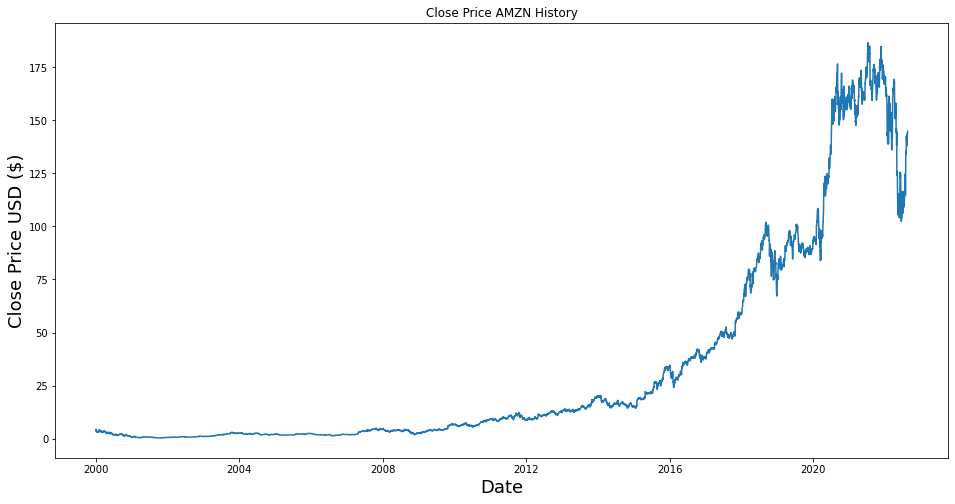

In [40]:
plt.figure(figsize=(16,8))

sns.lineplot(data=df_AMZN,
            x=df_AMZN.index,
            y='Close'
            )

plt.title("Close Price AMZN History")
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()



# 2. Create Training set

In [48]:
data_GGL = df_GGL.filter(['Close'])
data_AMZN = df_AMZN.filter(['Close'])
data_MSFT = df_MSFT.filter(['Close'])
data_AAPL = df_AAPL.filter(['Close'])

dataset_GGL = data_GGL.values
dataset_AMZN = data_AMZN.values
dataset_MSFT = data_MSFT.values
dataset_AAPL = data_AAPL.values

training_data_GGL_len = math.ceil(len(dataset_GGL) * 0.8)
training_data_AMZN_len = math.ceil(len(dataset_AMZN) * 0.8)
training_data_MSFT_len = math.ceil(len(dataset_MSFT) * 0.8)
training_data_AAPL_len = math.ceil(len(dataset_AAPL) * 0.8)

print(training_data_GGL_len, training_data_AMZN_len)

3624 4555


# 3. Scale Data

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))

df_GGL_scaled = scaler.fit_transform(np.array(df_GGL).reshape(-1,1))
df_AMZN_scaled = scaler.fit_transform(np.array(df_AMZN).reshape(-1,1))
df_MSFT_scaled = scaler.fit_transform(np.array(df_MSFT).reshape(-1,1))
df_AAPL_scaled = scaler.fit_transform(np.array(df_AAPL).reshape(-1,1))
